In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tensorflow.keras import layers, models

# 1. 데이터셋 만들기

In [86]:
def generate_dataset(num_samples):
    X = []
    y = []
    for _ in range(num_samples):
        x1 = np.random.uniform(0, 1)
        x2 = np.random.uniform(0, 1)
        if (x2 < x1 - 0.5) or (x2 > x1 + 0.5):
            X.append([x1, x2])
            y.append(1)
        else:
            X.append([x1, x2])
            y.append(0)
    return np.array(X), np.array(y)

In [87]:
# 데이터셋 생성
X_train, y_train = generate_dataset(1000)
X_test, y_test = generate_dataset(200)

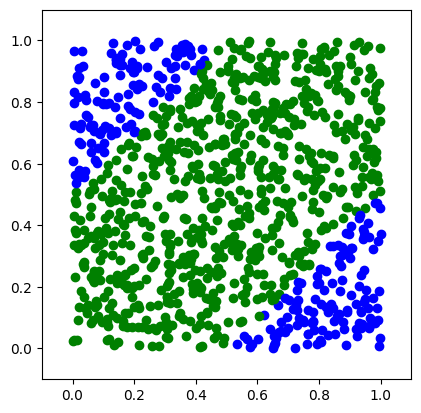

In [88]:
plt.figure(0)
plt.ylim(-0.1,1.1)
plt.xlim(-0.1,1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable ='box')

for i in  range(1000):
  if y_train[i] == 1:
    plt.plot(X_train[i][0],X_train[i][1], 'bo')
  else:
    plt.plot(X_train[i][0],X_train[i][1], 'go')

In [89]:
# 모델 정의
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(2,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 여기서 은닉층이 2개있어야 하는 이유를 잘 모르겠음

In [90]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [91]:
# 모델 훈련
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split = 0.2)

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 0.6569 - accuracy: 0.6862 - val_loss: 0.5972 - val_accuracy: 0.7750
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5761 - accuracy: 0.7412 - val_loss: 0.5199 - val_accuracy: 0.7750
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5241 - accuracy: 0.7412 - val_loss: 0.4733 - val_accuracy: 0.7750
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7462 - val_loss: 0.4213 - val_accuracy: 0.7950
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7987 - val_loss: 0.3649 - val_accuracy: 0.8650
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.8800 - val_loss: 0.3095 - val_accuracy: 0.9150
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3142 - accuracy: 0.9112 - val_loss: 0.2606 - val_accuracy: 0.9500
Epoch 8/10
25/25 [=

In [92]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.1758 - accuracy: 0.9600
Test accuracy: 0.9599999785423279


7/7 [==============================] - 0s 3ms/step


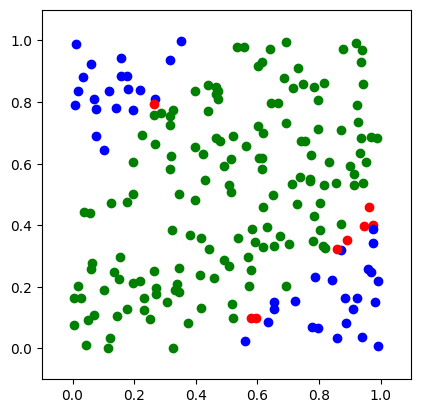

In [93]:
# X_test에 대한 예측
pred = model.predict(X_test)

plt.figure(1)
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

# 모델 예측 결과 플롯
for i in range(len(X_test)):
    if pred[i] >= 0.5:
      if y_test[i] == 1:
        plt.plot(X_test[i][0], X_test[i][1], 'bo')
      else:
        plt.plot(X_test[i][0], X_test[i][1], 'ro')
    else:
      if y_test[i] == 0:
        plt.plot(X_test[i][0], X_test[i][1], 'go')
      else:
        plt.plot(X_test[i][0], X_test[i][1], 'ro')